In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Titanic dataset.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Explore the dataset

In [4]:
 data.shape

(891, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Here we can see that there are missing values in Age, Cabin and Embark

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


There is a possibility of outlier in Age and Fare

In [7]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

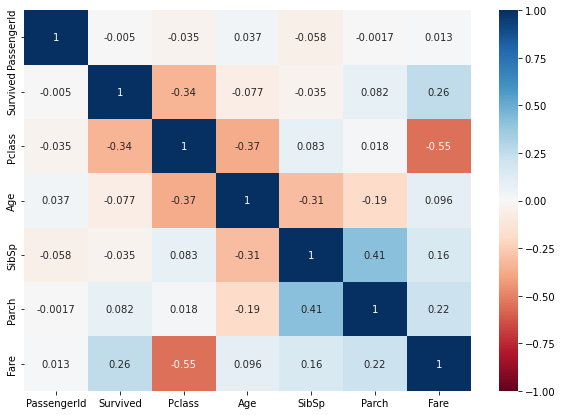

In [8]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), vmax=1, vmin=-1, cmap='RdBu', annot=True)

In [9]:
data.corr()['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

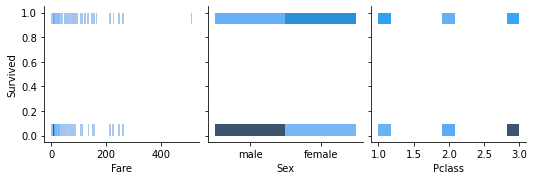

In [10]:
sns.pairplot(x_vars=['Fare', 'Sex', 'Pclass'], y_vars = ['Survived'], kind='hist', data = data)

## EDA

Does survival is dependent on gender?

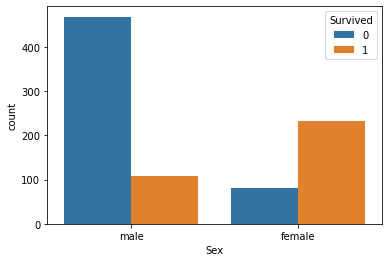

% of Male Survived 18.890814558058924
% of Female Survived 74.20382165605096


In [11]:
sns.countplot(data['Sex'], hue=data['Survived'])
plt.show()
sex_survived = data.groupby(by=['Sex','Survived'])['Survived'].count()

print('% of Male Survived', sex_survived['male'][1]*100/(sex_survived['male'][0]+sex_survived['male'][1]))
print('% of Female Survived', sex_survived['female'][1]*100/(sex_survived['female'][0]+sex_survived['female'][1]))

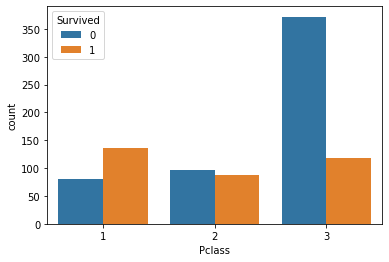

% of 1st Class Survived:  62.96296296296296
% of 2nd Class Survived:  47.28260869565217
% of 3rd Class Survived:  24.236252545824847


In [12]:
sns.countplot(data['Pclass'], hue=data['Survived'])
plt.show()
pclass_survived = data.groupby(by=['Pclass','Survived'])['Survived'].count()

print('% of 1st Class Survived: ', pclass_survived[1][1]*100/(pclass_survived[1][0]+pclass_survived[1][1]))
print('% of 2nd Class Survived: ', pclass_survived[2][1]*100/(pclass_survived[2][0]+pclass_survived[2][1]))
print('% of 3rd Class Survived: ', pclass_survived[3][1]*100/(pclass_survived[3][0]+pclass_survived[3][1]))

In [13]:
def age_category(age):
    if age<=12:
        return 'Children'
    elif age>12 and age<=18:
        return 'Teenagers'
    elif age>18 and age<=35:
        return 'Youth'
    elif age>35 and age<=60:
        return 'Midage'
    else:
        return 'Seniors'

In [14]:
data['AgeCategory'] = data['Age'].apply(age_category)

In [15]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeCategory
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Youth
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Midage
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Youth
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Youth
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Youth


<AxesSubplot:xlabel='AgeCategory', ylabel='count'>

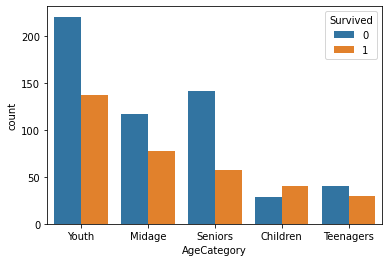

In [16]:
sns.countplot(data['AgeCategory'], hue=data['Survived'])

In [17]:
data.groupby(by=['AgeCategory','Survived'])['Survived'].count()

AgeCategory  Survived
Children     0            29
             1            40
Midage       0           117
             1            78
Seniors      0           142
             1            57
Teenagers    0            40
             1            30
Youth        0           221
             1           137
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Embarked', ylabel='count'>

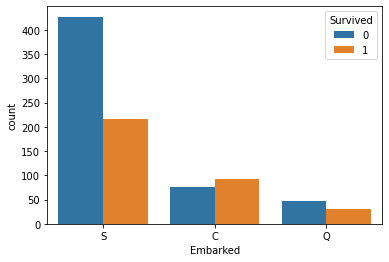

In [18]:
sns.countplot(data['Embarked'], hue=data['Survived'])

## Missing value Treatment

In [19]:
((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending=False)

Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
AgeCategory     0.000000
dtype: float64

In [20]:
data[data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeCategory
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Midage
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Seniors


In [21]:
data.groupby(by=['Pclass', 'Embarked'])['Fare'].median()

Pclass  Embarked
1       C           78.2667
        Q           90.0000
        S           52.0000
2       C           24.0000
        Q           12.3500
        S           13.5000
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [22]:
data['Embarked'].mode()

0    S
dtype: object

In [23]:
data['Embarked'].fillna('C', inplace=True)

In [24]:
data[data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeCategory


<AxesSubplot:xlabel='Age'>

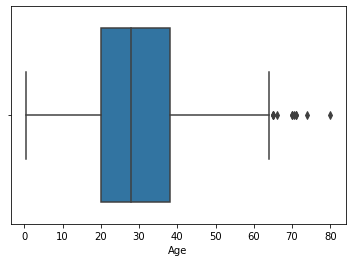

In [25]:
sns.boxplot(data['Age'])

In [26]:
data[data['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeCategory
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Seniors
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,Seniors
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,Seniors
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,Seniors
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,Seniors
...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C,Seniors
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,Seniors
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S,Seniors
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S,Seniors


In [27]:
data['Age'].fillna(data['Age'].median(), inplace=True)

In [28]:
data[data['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeCategory


In [29]:
((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending=False)

Cabin          77.104377
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Embarked        0.000000
AgeCategory     0.000000
dtype: float64

Since 77% data is missing in Cabin, we will drop the column

In [30]:
del data['Cabin']

In [31]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeCategory
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Youth
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Midage
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Youth
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Youth
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Youth


In [32]:
((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending=False)

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
AgeCategory    0.0
dtype: float64

## Outlier Treatment

<AxesSubplot:xlabel='Fare'>

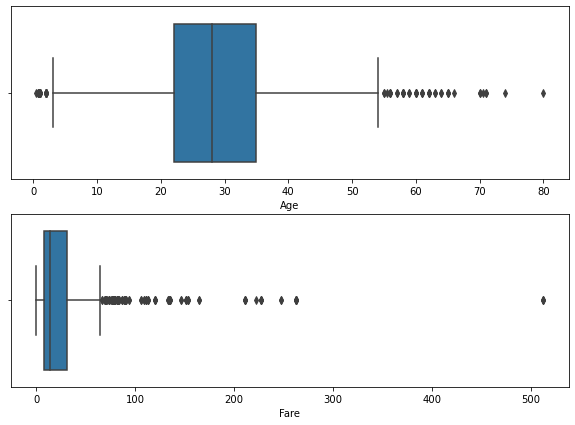

In [33]:
plt.figure(figsize=(10,7))
plt.subplot(2,1,1,)
sns.boxplot(data['Age'])
plt.subplot(2,1,2)
sns.boxplot(data['Fare'])

In [34]:
data[data['Fare']>500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeCategory
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C,Youth
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C,Midage
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C,Youth


In [35]:
data.drop(index=[258,679,737], inplace=True)

## Feature Selection

In [36]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeCategory
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Youth
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Midage
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Youth
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Youth
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Youth


In [37]:
data.drop(columns=['PassengerId','Name','Ticket','AgeCategory'], inplace=True)

In [38]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## Feature Engineering

In [39]:
data.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [40]:
data = pd.get_dummies(data,drop_first=True)

In [41]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


## Train Test Split

In [42]:
x = data.drop(columns=['Survived'])
y=data['Survived']

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=.8, stratify=y, random_state=1)

## Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
lr = LogisticRegression()

In [47]:
lr.fit(x_train, y_train)

LogisticRegression()

In [48]:
y_pred = lr.predict(x_test)

In [49]:
pd.DataFrame({'Actual':y_test, 'Predicted':y_pred}).head(20)

,Actual,Predicted
745,0,0
874,1,1
54,0,0
232,0,0
770,0,0
313,0,0
187,1,0
628,0,0
820,1,1
742,1,1


In [50]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score, log_loss

In [51]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[90, 20],
       [15, 53]], dtype=int64)

In [52]:
def printScores(test,pred):

    print('Confusion Matrix:\n',confusion_matrix(test,pred))
    print('Accuracy: ', np.round(accuracy_score(test, pred)*100,2),'%')
    print('Recall: ', np.round(recall_score(test, pred)*100,2),'%')
    print('Precision: ', np.round(precision_score(test, pred)*100,2),'%')
    print('F1 Score: ', np.round(f1_score(test, pred)*100,2),'%')
printScores(y_test, y_pred)

Confusion Matrix:
 [[90 20]
 [15 53]]
Accuracy:  80.34 %
Recall:  77.94 %
Precision:  72.6 %
F1 Score:  75.18 %


In [53]:
# Soft Predictions
y_pred_lr_soft = lr.predict_proba(x_test)
y_pred_lr_soft

array([[0.8781655 , 0.1218345 ],
       [0.16870484, 0.83129516],
       [0.75522424, 0.24477576],
       [0.91303951, 0.08696049],
       [0.88910829, 0.11089171],
       [0.90484386, 0.09515614],
       [0.62609179, 0.37390821],
       [0.89713142, 0.10286858],
       [0.20699179, 0.79300821],
       [0.07931553, 0.92068447],
       [0.37597948, 0.62402052],
       [0.27144285, 0.72855715],
       [0.72491674, 0.27508326],
       [0.44508958, 0.55491042],
       [0.0865674 , 0.9134326 ],
       [0.64952641, 0.35047359],
       [0.14704331, 0.85295669],
       [0.04594116, 0.95405884],
       [0.82020023, 0.17979977],
       [0.87235598, 0.12764402],
       [0.26188076, 0.73811924],
       [0.4462022 , 0.5537978 ],
       [0.32442936, 0.67557064],
       [0.87539876, 0.12460124],
       [0.86569484, 0.13430516],
       [0.24631783, 0.75368217],
       [0.69727012, 0.30272988],
       [0.8719233 , 0.1280767 ],
       [0.06025147, 0.93974853],
       [0.90476036, 0.09523964],
       [0.

In [54]:
print('Log Loss: ', np.round(log_loss(y_test, y_pred_lr_soft),4)*100, '%')
print('Coeff: ', lr.coef_)
print('Intercept: ', lr.intercept_)

Log Loss:  42.75 %
Coeff:  [[-1.24997473e+00 -4.32466000e-02 -2.85555245e-01 -2.62436674e-02
  -1.50103485e-03 -2.57366044e+00  7.86833033e-02 -3.33170584e-01]]
Intercept:  [5.62726861]


In [55]:
pd.DataFrame({'Actual':y_test, 'Predicted':y_pred, 'Soft_Pred':y_pred_lr_soft[:,1]}).head(20)

,Actual,Predicted,Soft_Pred
745,0,0,0.121834
874,1,1,0.831295
54,0,0,0.244776
232,0,0,0.086960
770,0,0,0.110892
313,0,0,0.095156
187,1,0,0.373908
628,0,0,0.102869
820,1,1,0.793008
742,1,1,0.920684


In [56]:
threshold = .65
y_pred_65 = ((y_pred_lr_soft[:,1]>=threshold).astype(int))
y_pred_65

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0])

In [57]:
pd.DataFrame({'Actual':y_test, 'Predicted':y_pred, 'Soft_Pred':y_pred_lr_soft[:,1], 'Soft_Pred .65': y_pred_65}).head(20)

,Actual,Predicted,Soft_Pred,Soft_Pred .65
745,0,0,0.121834,0
874,1,1,0.831295,1
54,0,0,0.244776,0
232,0,0,0.086960,0
770,0,0,0.110892,0
313,0,0,0.095156,0
187,1,0,0.373908,0
628,0,0,0.102869,0
820,1,1,0.793008,1
742,1,1,0.920684,1


In [58]:
print('Accuracy: ', accuracy_score(y_test, y_pred_65))

Accuracy:  0.848314606741573


## ROC Curve

In [59]:
from sklearn.metrics import roc_auc_score, roc_curve

In [60]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_lr_soft[:,1])

In [61]:
pd.DataFrame({'FPR': fpr, 'TPR': tpr, 'Threshold': threshold})

,FPR,TPR,Threshold
0,0.000000,0.000000,1.961666
1,0.000000,0.014706,0.961666
2,0.000000,0.411765,0.793008
3,0.018182,0.411765,0.787415
4,0.018182,0.514706,0.750691
5,0.027273,0.514706,0.738119
6,0.027273,0.588235,0.724226
7,0.036364,0.588235,0.716452
8,0.036364,0.617647,0.695887
9,0.036364,0.661765,0.675571


Area under the curve:  0.8582219251336898


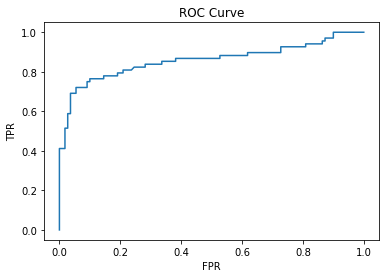

In [62]:
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
print('Area under the curve: ', roc_auc_score(y_test, y_pred_lr_soft[:,1]))

Find Threshold value where difference between TPR and FPR is Maximum?

## Naive Baye's Model

In [63]:
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()

In [64]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(710, 8) (710,) (178, 8) (178,)


In [65]:
model_nb.fit(x_train,y_train)

GaussianNB()

In [66]:
y_pred_nb = model_nb.predict(x_test)
print('Naive Bayes Model')
printScores(y_test, y_pred_nb)
print()
printScores(y_test, y_pred)

Naive Bayes Model
Confusion Matrix:
 [[94 16]
 [15 53]]
Accuracy:  82.58 %
Recall:  77.94 %
Precision:  76.81 %
F1 Score:  77.37 %

Confusion Matrix:
 [[90 20]
 [15 53]]
Accuracy:  80.34 %
Recall:  77.94 %
Precision:  72.6 %
F1 Score:  75.18 %


In [67]:
y_pred_nb_soft = model_nb.predict_proba(x_test)
y_pred_nb_soft

array([[2.18515997e-01, 7.81484003e-01],
       [7.76359423e-02, 9.22364058e-01],
       [1.45021771e-01, 8.54978229e-01],
       [8.44914686e-01, 1.55085314e-01],
       [9.41196470e-01, 5.88035295e-02],
       [9.44454499e-01, 5.55455006e-02],
       [6.44487202e-01, 3.55512798e-01],
       [9.43052585e-01, 5.69474152e-02],
       [6.00538919e-03, 9.93994611e-01],
       [1.52754500e-09, 9.99999998e-01],
       [9.44714292e-01, 5.52857081e-02],
       [1.73867546e-01, 8.26132454e-01],
       [5.39837889e-01, 4.60162111e-01],
       [6.46617312e-01, 3.53382688e-01],
       [1.02811589e-01, 8.97188411e-01],
       [8.64516338e-01, 1.35483662e-01],
       [7.34346577e-02, 9.26565342e-01],
       [1.96002356e-02, 9.80399764e-01],
       [8.28216336e-01, 1.71783664e-01],
       [8.80546446e-01, 1.19453554e-01],
       [1.91647386e-01, 8.08352614e-01],
       [9.99208439e-01, 7.91560948e-04],
       [2.10450095e-01, 7.89549905e-01],
       [9.37979007e-01, 6.20209926e-02],
       [9.352262

In [68]:
pd.DataFrame({'Actual':y_test, 'Predicted LR':y_pred, 'Soft_Pred LR':y_pred_lr_soft[:,1], 'Pedicted NB':y_pred_nb,'Soft_Pred NB': y_pred_nb_soft[:,1]}).head(20)

,Actual,Predicted LR,Soft_Pred LR,Pedicted NB,Soft_Pred NB
745,0,0,0.121834,1,0.781484
874,1,1,0.831295,1,0.922364
54,0,0,0.244776,1,0.854978
232,0,0,0.086960,0,0.155085
770,0,0,0.110892,0,0.058804
313,0,0,0.095156,0,0.055546
187,1,0,0.373908,0,0.355513
628,0,0,0.102869,0,0.056947
820,1,1,0.793008,1,0.993995
742,1,1,0.920684,1,1.000000


In [69]:
fpr_nb, tpr_nb, threshold_nb = roc_curve(y_test, y_pred_nb_soft[:,1])

Area under the curve NB:  0.8538101604278074
Area under the curve LR:  0.8582219251336898


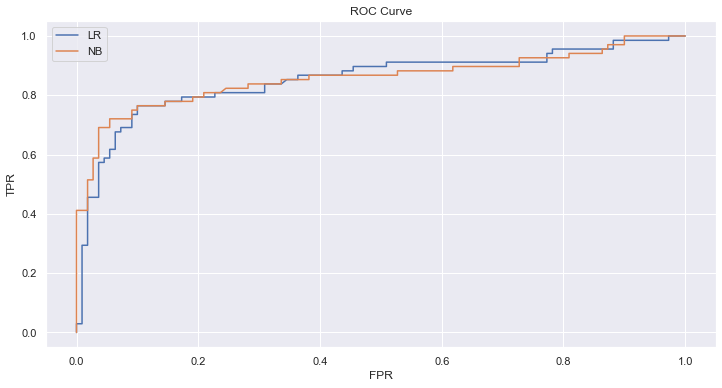

In [70]:
sns.set(rc={'figure.figsize':(12,6)})
plt.plot(fpr_nb,tpr_nb)
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(['LR','NB'])
print('Area under the curve NB: ', roc_auc_score(y_test, y_pred_nb_soft[:,1]))
print('Area under the curve LR: ', roc_auc_score(y_test, y_pred_lr_soft[:,1]))

## Decision Tree

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
model_dt = DecisionTreeClassifier()

In [72]:
params = {'criterion':['gini','entropy'],
         'max_depth':[2,3,4,5]}
gscv = GridSearchCV(estimator=DecisionTreeClassifier(),
                   param_grid=params,
                   cv=3,
                   scoring='accuracy',
                   verbose=3)

In [73]:
gscv.fit(x_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV 1/3] END .......criterion=gini, max_depth=2;, score=0.797 total time=   0.0s
[CV 2/3] END .......criterion=gini, max_depth=2;, score=0.793 total time=   0.0s
[CV 3/3] END .......criterion=gini, max_depth=2;, score=0.771 total time=   0.0s
[CV 1/3] END .......criterion=gini, max_depth=3;, score=0.814 total time=   0.0s
[CV 2/3] END .......criterion=gini, max_depth=3;, score=0.810 total time=   0.0s
[CV 3/3] END .......criterion=gini, max_depth=3;, score=0.784 total time=   0.0s
[CV 1/3] END .......criterion=gini, max_depth=4;, score=0.785 total time=   0.0s
[CV 2/3] END .......criterion=gini, max_depth=4;, score=0.797 total time=   0.0s
[CV 3/3] END .......criterion=gini, max_depth=4;, score=0.809 total time=   0.0s
[CV 1/3] END .......criterion=gini, max_depth=5;, score=0.768 total time=   0.0s
[CV 2/3] END .......criterion=gini, max_depth=5;, score=0.810 total time=   0.0s
[CV 3/3] END .......criterion=gini, max_depth=5;,

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5]},
             scoring='accuracy', verbose=3)

In [74]:
print(gscv.best_params_, gscv.best_score_*100)

{'criterion': 'entropy', 'max_depth': 4} 81.9715607046652


In [75]:
model_dt = DecisionTreeClassifier(**gscv.best_params_)
model_dt.fit(x_train,y_train)
y_pred_dt = model_dt.predict(x_test)

In [76]:
pd.DataFrame({'Actual':y_test, 'Predicted LR':y_pred, 'Pedicted NB':y_pred_nb, 'Predicted DT':y_pred_dt}).head(20)

,Actual,Predicted LR,Pedicted NB,Predicted DT
745,0,0,1,0
874,1,1,1,1
54,0,0,1,0
232,0,0,0,0
770,0,0,0,0
313,0,0,0,0
187,1,0,0,0
628,0,0,0,0
820,1,1,1,1
742,1,1,1,1


In [77]:
printScores(y_test, y_pred_dt)

Confusion Matrix:
 [[103   7]
 [ 26  42]]
Accuracy:  81.46 %
Recall:  61.76 %
Precision:  85.71 %
F1 Score:  71.79 %


In [78]:
printScores(y_test, y_pred)

Confusion Matrix:
 [[90 20]
 [15 53]]
Accuracy:  80.34 %
Recall:  77.94 %
Precision:  72.6 %
F1 Score:  75.18 %


In [79]:
printScores(y_test, y_pred_nb)

Confusion Matrix:
 [[94 16]
 [15 53]]
Accuracy:  82.58 %
Recall:  77.94 %
Precision:  76.81 %
F1 Score:  77.37 %


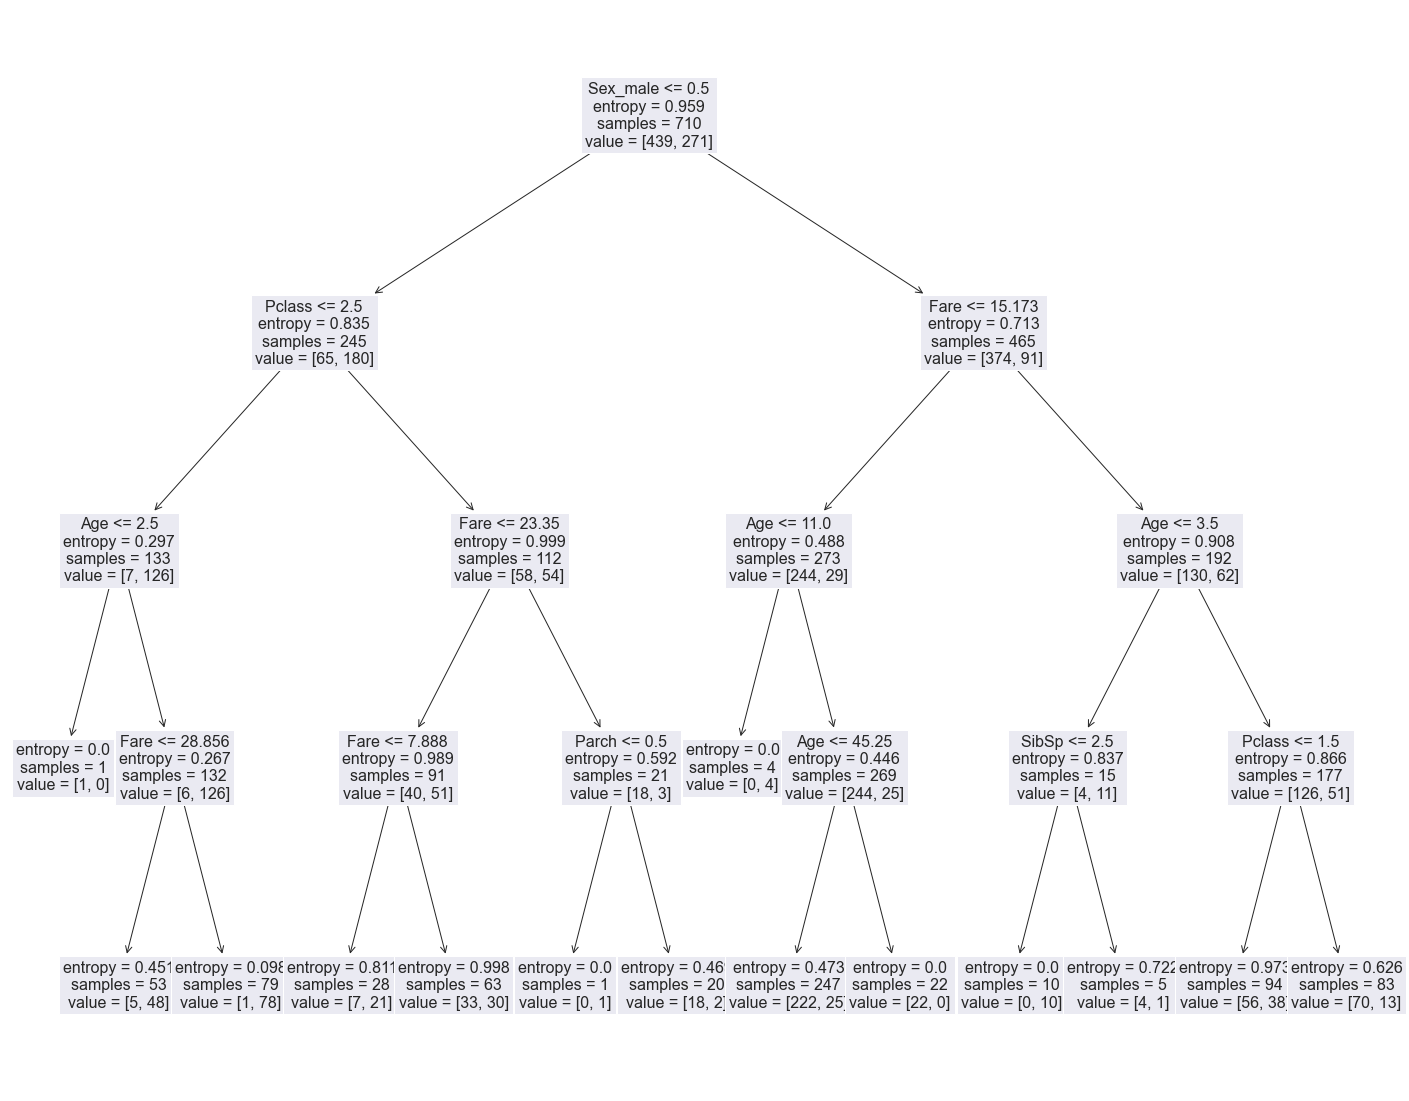

In [80]:
from sklearn import tree
sns.set(rc={'figure.figsize':(25,20)})
tree.plot_tree(model_dt, feature_names=x_train.columns, fontsize=16)
plt.show()

In [81]:
y_pred_dt_soft = model_dt.predict_proba(x_test)

In [82]:
fpr_dt, tpr_dt, threshold_dt = roc_curve(y_test, y_pred_dt_soft[:,1])

Area under the curve NB:  0.8538101604278074
Area under the curve LR:  0.8582219251336898
Area under the curve DT:  0.8455213903743316


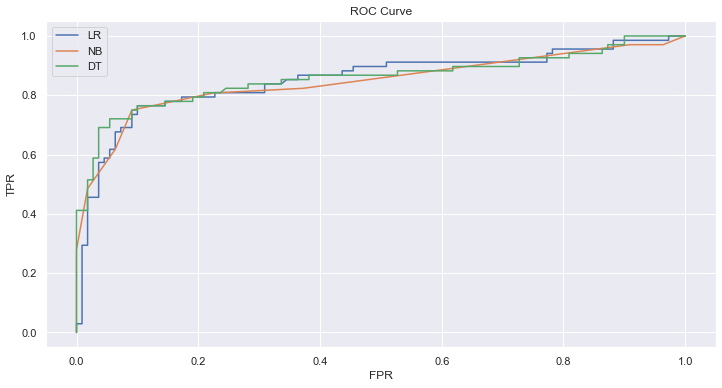

In [83]:
sns.set(rc={'figure.figsize':(12,6)})
plt.plot(fpr_nb,tpr_nb)
plt.plot(fpr_dt,tpr_dt)
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(['LR','NB','DT'])
print('Area under the curve NB: ', roc_auc_score(y_test, y_pred_nb_soft[:,1]))
print('Area under the curve LR: ', roc_auc_score(y_test, y_pred_lr_soft[:,1]))
print('Area under the curve DT: ', roc_auc_score(y_test, y_pred_dt_soft[:,1]))